# How to Use Variance Threshold Properly
## There is more to it than just choosing a threshold
<img src='images/pexels.jpg'></img>
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://www.pexels.com/@billelmoula?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Billel Moula</a>
        on 
        <a href='https://www.pexels.com/photo/black-and-teal-mountain-540518/?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Pexels</a>
    </strong>
</figcaption>

### Setup

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")

### Intro to Feature Selection

Today, it is common for datasets to have hundreds if not thousands of features. On the surface, this might seem like a good thing - more features give more information about each sample. But more often that not, these additional features don't provide that much value and introduce unnecessary complexity.

The biggest challenge of Machine Learning is to create models that have robust predictive power by using as few features as possible. But given the massive sizes of today's datasets, it is easy to lose the oversight of which features are important and which ones aren't. 

That's why, there is an entire skill to be learned in the ML field - **feature selection**. Feature selection is the process of choosing a subset of the most important features while trying to retain as much information as possible. 

As an example, let's say we have a dataset of body measurements such as weight, height, BMI, etc. Basic feature selection techniques should be able to drop BMI by finding out that BMI can be represented by weight and height.

In this article, we will explore one such feature selection technique called Variance Thresholding. This technique is a quick and light-weight way of eliminating features with very low variance, i. e. features with not much useful information.

### A Note on Variance

For those who are not familiar, *variance*, as the name suggests, shows the variability in a distribution in a single metric. It shows how spread out the distribution is and shows the average squared distance from the mean:

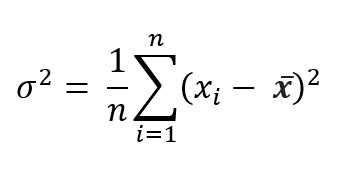

Obviously, distributions with bigger values yield a bigger variance because each difference is squared. But the main thing we care about in ML is that the distribution actually contains useful information. For example, consider this distribution:

In [3]:
dist_1 = [2, 2, 2, 2, 2, 2, 2, 2]

np.std(dist_1)

0.0

Computing the variance with Numpy shows us that the distribution has 0 variance or in other words completely useless. Using a feature with zero-variance only adds to model complexity not to its predictive power. Consider another one:

In [4]:
dist_2 = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6]

np.std(dist_2)

0.28747978728803447

Similarly, this one is almost made up of a single constant. Distributions that go around a single constant with a few exceptions are also useless. In other words, any feature or distribution with close to 0 variance should be dropped. 

### How to Use Scikit-learn's VarianceThreshold Estimator